<a href="https://colab.research.google.com/github/jmisf14/Predicting-UFC-Fight-Outcomes/blob/main/UFCPredictor_Jos%C3%A9MiguelSerrano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting-UFC-Fight-Outcomes


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [10]:
# Load datasets
results = pd.read_csv("/content/ufc_fight_results.csv")
stats = pd.read_csv("/content/ufc_fight_stats.csv")
fighters = pd.read_csv("/content/ufc_fighters.csv")


In [11]:
results.head()

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,URL
0,UFC Fight Night: Edwards vs. Brady,Leon Edwards vs. Sean Brady,L/W,Welterweight Bout,Submission,4,1:39,5 Rnd (5-5-5-5-5),Jason Herzog,Guillotine Choke From Mount,http://ufcstats.com/fight-details/371ed8497799...
1,UFC Fight Night: Edwards vs. Brady,Jan Blachowicz vs. Carlos Ulberg,L/W,Light Heavyweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Marc Goddard,Ben Cartlidge 28 - 29.David Lethaby 28 - 29.Vi...,http://ufcstats.com/fight-details/6d9ea9f436ed...
2,UFC Fight Night: Edwards vs. Brady,Gunnar Nelson vs. Kevin Holland,L/W,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Daniel Movahedi,Darryl Ransom 28 - 29.David Lethaby 28 - 29.An...,http://ufcstats.com/fight-details/96c6be6b2238...
3,UFC Fight Night: Edwards vs. Brady,Molly McCann vs. Alexia Thainara,L/W,Women's Strawweight Bout,Submission,1,4:32,3 Rnd (5-5-5),Lukasz Bosacki,Rear Naked Choke,http://ufcstats.com/fight-details/b5b4b69bccb9...
4,UFC Fight Night: Edwards vs. Brady,Jordan Vucenic vs. Chris Duncan,L/W,Lightweight Bout,Submission,2,3:42,3 Rnd (5-5-5),Jason Herzog,Guillotine Choke After Drop to Guard,http://ufcstats.com/fight-details/8e6640c007ad...


In [12]:
stats.head()

,EVENT,BOUT,ROUND,FIGHTER,KD,SIG.STR.,SIG.STR. %,TOTAL STR.,TD,TD %,SUB.ATT,REV.,CTRL,HEAD,BODY,LEG,DISTANCE,CLINCH,GROUND
0,UFC Fight Night: Edwards vs. Brady,Leon Edwards vs. Sean Brady,Round 1,Leon Edwards,0.0,20 of 29,68%,20 of 29,0 of 0,---,0.0,0.0,0:15,8 of 16,11 of 12,1 of 1,8 of 17,12 of 12,0 of 0
1,UFC Fight Night: Edwards vs. Brady,Leon Edwards vs. Sean Brady,Round 2,Leon Edwards,0.0,0 of 0,---,0 of 0,0 of 0,---,0.0,0.0,0:00,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0,0 of 0
2,UFC Fight Night: Edwards vs. Brady,Leon Edwards vs. Sean Brady,Round 3,Leon Edwards,0.0,3 of 4,75%,3 of 4,0 of 1,0%,0.0,0.0,0:00,2 of 3,0 of 0,1 of 1,3 of 4,0 of 0,0 of 0
3,UFC Fight Night: Edwards vs. Brady,Leon Edwards vs. Sean Brady,Round 4,Leon Edwards,0.0,0 of 2,0%,0 of 2,0 of 0,---,0.0,0.0,0:00,0 of 2,0 of 0,0 of 0,0 of 2,0 of 0,0 of 0
4,UFC Fight Night: Edwards vs. Brady,Leon Edwards vs. Sean Brady,Round 1,Sean Brady,0.0,19 of 39,48%,47 of 69,1 of 1,100%,0.0,0.0,0:54,10 of 27,6 of 6,3 of 6,13 of 33,6 of 6,0 of 0


In [13]:
fighters.head()

,First Name,Last Name,Nickname,Height,Weight,Reach,Stance,Wins,Losses,Draws
0,Tom,Aaron,NaN,--,155 lbs.,--,NaN,5,3,0
1,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0
2,Nariman,Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0
3,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0
4,Hamdy,Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0


## Data Cleaning

### Clean fighters

In [14]:
# Combine first and last name
fighters["First Name"] = fighters["First Name"].fillna("").str.strip()
fighters["Last Name"] = fighters["Last Name"].fillna("").str.strip()
fighters["fighter_name"] = (fighters["First Name"] + " " + fighters["Last Name"]).str.strip()

# Optional: clean nickname
fighters["Nickname"] = fighters["Nickname"].fillna("Unknown")

# Drop unnecessary name parts
fighters.drop(columns=["First Name", "Last Name"], inplace=True)

fighters.head()

,Nickname,Height,Weight,Reach,Stance,Wins,Losses,Draws,fighter_name
0,Unknown,--,155 lbs.,--,NaN,5,3,0,Tom Aaron
1,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0,Danny Abbadi
2,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0,Nariman Abbasov
3,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0,David Abbott
4,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,5,0,0,Hamdy Abdelwahab


### Clean results

In [15]:
# Split fighter names from 'bout'
results[["fighter_A", "fighter_B"]] = results["BOUT"].str.split(" vs. ", expand=True)

# Melt into long format: 1 row per fighter
long_results = pd.melt(
    results,
    id_vars=[col for col in results.columns if col not in ["fighter_A", "fighter_B"]],
    value_vars=["fighter_A", "fighter_B"],
    var_name="corner", value_name="fighter_name"
)
results.drop(columns=["URL"], inplace=True)
long_results["corner"] = long_results["corner"].map({"fighter_A": "Red", "fighter_B": "Blue"})
results.head()

,EVENT,BOUT,OUTCOME,WEIGHTCLASS,METHOD,ROUND,TIME,TIME FORMAT,REFEREE,DETAILS,fighter_A,fighter_B
0,UFC Fight Night: Edwards vs. Brady,Leon Edwards vs. Sean Brady,L/W,Welterweight Bout,Submission,4,1:39,5 Rnd (5-5-5-5-5),Jason Herzog,Guillotine Choke From Mount,Leon Edwards,Sean Brady
1,UFC Fight Night: Edwards vs. Brady,Jan Blachowicz vs. Carlos Ulberg,L/W,Light Heavyweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Marc Goddard,Ben Cartlidge 28 - 29.David Lethaby 28 - 29.Vi...,Jan Blachowicz,Carlos Ulberg
2,UFC Fight Night: Edwards vs. Brady,Gunnar Nelson vs. Kevin Holland,L/W,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Daniel Movahedi,Darryl Ransom 28 - 29.David Lethaby 28 - 29.An...,Gunnar Nelson,Kevin Holland
3,UFC Fight Night: Edwards vs. Brady,Molly McCann vs. Alexia Thainara,L/W,Women's Strawweight Bout,Submission,1,4:32,3 Rnd (5-5-5),Lukasz Bosacki,Rear Naked Choke,Molly McCann,Alexia Thainara
4,UFC Fight Night: Edwards vs. Brady,Jordan Vucenic vs. Chris Duncan,L/W,Lightweight Bout,Submission,2,3:42,3 Rnd (5-5-5),Jason Herzog,Guillotine Choke After Drop to Guard,Jordan Vucenic,Chris Duncan


In [24]:
results["winner"] = results["OUTCOME"].apply(lambda x: 1 if isinstance(x, str) and x.startswith("W") else 0)

In [25]:
features = ["WEIGHTCLASS", "METHOD", "ROUND"]
X = results[features]
y = results["winner"]

In [26]:
X["WEIGHTCLASS"] = X["WEIGHTCLASS"].fillna("Unknown")
X["METHOD"] = X["METHOD"].fillna("Unknown")
X["ROUND"] = X["ROUND"].fillna(0)

<ipython-input-26-4e1e968352aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["WEIGHTCLASS"] = X["WEIGHTCLASS"].fillna("Unknown")
<ipython-input-26-4e1e968352aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["METHOD"] = X["METHOD"].fillna("Unknown")
<ipython-input-26-4e1e968352aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

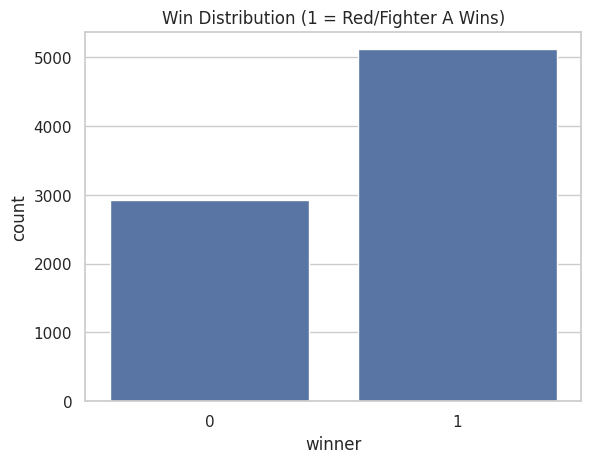

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot outcome distribution
sns.countplot(x="winner", data=results)
plt.title("Win Distribution (1 = Red/Fighter A Wins)")
plt.show()

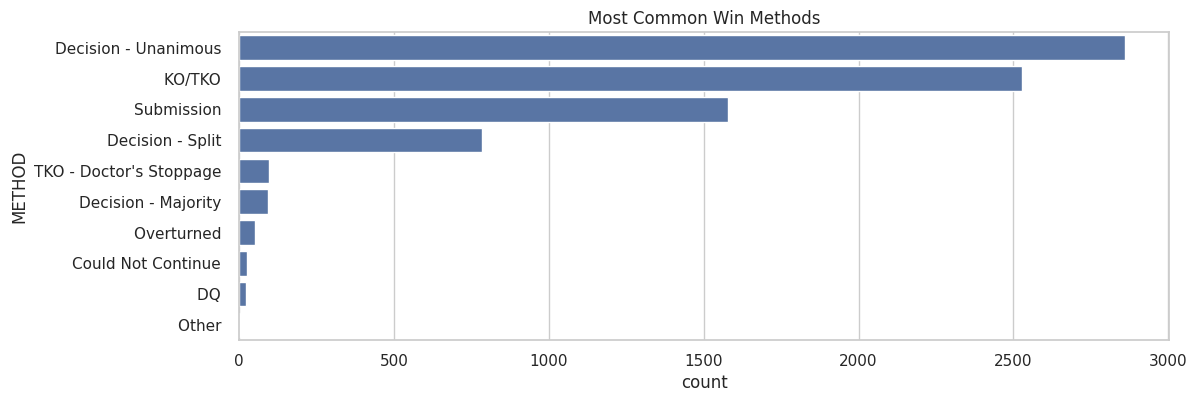

In [48]:
# Method distribution
plt.figure(figsize=(12, 4))
sns.countplot(y="METHOD", data=results, order=results["METHOD"].value_counts().index)
plt.title("Most Common Win Methods")
plt.show()

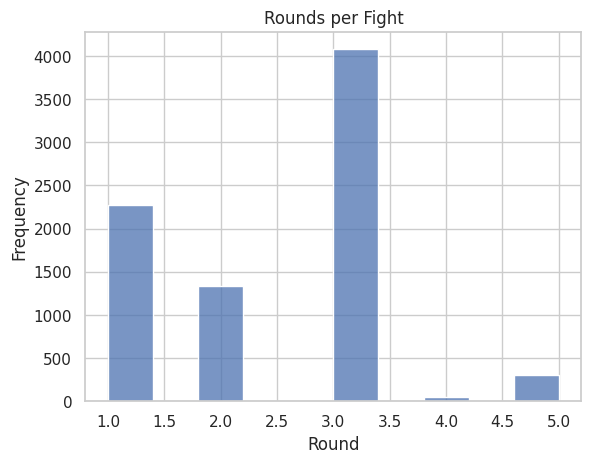

In [49]:
# Rounds per fight
sns.histplot(results["ROUND"].fillna(0), bins=10)
plt.title("Rounds per Fight")
plt.xlabel("Round")
plt.ylabel("Frequency")
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf_win = RandomForestClassifier(n_estimators=100, random_state=42)
clf_win.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Step 1 — map methods to numeric labels FIRST
results["method_label"] = results["METHOD"].apply(lambda m: "KO/TKO" if "KO" in str(m) or "TKO" in str(m)
                                                  else "Submission" if "Submission" in str(m)
                                                  else "Decision")
method_map = {"KO/TKO": 0, "Decision": 1, "Submission": 2}
results["method_numeric"] = results["method_label"].map(method_map)

# Step 2 — define features and labels together
features = ["WEIGHTCLASS", "ROUND"]
X = results[features]
y_win = results["winner"]
y_method = results["method_numeric"]

# One-hot encode
X = pd.get_dummies(X, columns=["WEIGHTCLASS"], drop_first=True)

# Step 3 — train/test split ON ALL THREE
from sklearn.model_selection import train_test_split

X_train, X_test, y_win_train, y_win_test, y_method_train, y_method_test = train_test_split(
    X, y_win, y_method, test_size=0.2, random_state=42, stratify=y_win
)


In [55]:
def map_method(method):
    if "KO" in method or "TKO" in method:
        return "KO/TKO"
    elif "Submission" in method:
        return "Submission"
    elif "Decision" in method:
        return "Decision"
    else:
        return "Decision"

results["method_label"] = results["METHOD"].apply(map_method)

# Map to numeric labels for training
method_map = {"KO/TKO": 0, "Decision": 1, "Submission": 2}
results["method_numeric"] = results["method_label"].map(method_map)

# Use same features as before
y_method = results["method_numeric"]

from sklearn.ensemble import RandomForestClassifier
clf_method = RandomForestClassifier(n_estimators=100, random_state=42)
clf_method.fit(X_train, y_method_train)

RandomForestClassifier(random_state=42)

In [87]:
def predict_fight(fighter_a, fighter_b, clf_win, clf_method, features):
    import pandas as pd

    # Default simulation values
    weightclass = "Lightweight Bout"
    round_num = 3
    fight_time_str = "3:00"
    method_hint = "Decision"

    def time_to_seconds(t):
        try:
            m, s = map(int, t.split(":"))
            return m * 60 + s
        except:
            return 0

    # Feature engineering (match training!)
    fight_time = time_to_seconds(fight_time_str)
    is_ko = 1 if "KO" in method_hint or "TKO" in method_hint else 0
    is_sub = 1 if "Submission" in method_hint else 0
    is_dec = 1 if "Decision" in method_hint else 0

    # Construct input dataframe
    input_df = pd.DataFrame([{
        "ROUND": round_num,
        "fight_time": fight_time,
        "is_ko": is_ko,
        "is_sub": is_sub,
        "is_dec": is_dec,
        "WEIGHTCLASS": weightclass
    }])

    # One-hot encode weightclass
    input_encoded = pd.get_dummies(input_df, columns=["WEIGHTCLASS"])

    # Add missing training columns
    for col in features:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Reorder columns to match training
    input_encoded = input_encoded[features]

    # Predictions
    win_proba = clf_win.predict_proba(input_encoded)[0]
    method_pred = clf_method.predict(input_encoded)[0]
    method_map = {0: "KO/TKO", 1: "Decision", 2: "Submission"}

    return {
        f"{fighter_a} Win %": round(win_proba[1] * 100, 2),
        f"{fighter_b} Win %": round(win_proba[0] * 100, 2),
        "Most Likely Method": method_map[method_pred]
    }



In [88]:
predict_fight(
    fighter_a="Jon Jones",
    fighter_b="Alex Pereira",
    clf_win=clf_win,
    clf_method=clf_method,
    features=X.columns.tolist()
)


<ipython-input-87-c68dc3c2136c>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
<ipython-input-87-c68dc3c2136c>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
<ipython-input-87-c68dc3c2136c>:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_enc

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- fight_time
- is_dec
- is_ko
- is_sub


In [89]:
# UFC Fantasy Matchup Predictor (Fixed Feature Mismatch)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Target variable: who won (1 = Fighter A)
results["winner"] = results["OUTCOME"].apply(lambda x: 1 if isinstance(x, str) and x.startswith("W") else 0)

# Map methods to KO/TKO, Decision, Submission
results["method_label"] = results["METHOD"].apply(
    lambda m: "KO/TKO" if "KO" in str(m) or "TKO" in str(m)
    else "Submission" if "Submission" in str(m)
    else "Decision"
)
method_map = {"KO/TKO": 0, "Decision": 1, "Submission": 2}
results["method_numeric"] = results["method_label"].map(method_map)

# Fill missing
results["WEIGHTCLASS"] = results["WEIGHTCLASS"].fillna("Unknown")
results["ROUND"] = results["ROUND"].fillna(0)

# Select features
features = ["WEIGHTCLASS", "ROUND"]
X = pd.get_dummies(results[features], columns=["WEIGHTCLASS"], drop_first=True)
y_win = results["winner"]
y_method = results["method_numeric"]

# Train/test split
X_train, X_test, y_win_train, y_win_test, y_method_train, y_method_test = train_test_split(
    X, y_win, y_method, test_size=0.2, stratify=y_win, random_state=42
)

# Train classifiers
clf_win = RandomForestClassifier(n_estimators=100, random_state=42)
clf_win.fit(X_train, y_win_train)

clf_method = RandomForestClassifier(n_estimators=100, random_state=42)
clf_method.fit(X_train, y_method_train)

# Evaluation
print("Win Accuracy:", accuracy_score(y_win_test, clf_win.predict(X_test)))
print("Method Accuracy:", accuracy_score(y_method_test, clf_method.predict(X_test)))

# Final Prediction Function
def predict_fantasy_matchup(fighter_a_name, fighter_b_name, clf_win, clf_method, features):
    weightclass = "Lightweight Bout"
    round_num = 3

    input_df = pd.DataFrame([{"WEIGHTCLASS": weightclass, "ROUND": round_num}])
    input_encoded = pd.get_dummies(input_df, columns=["WEIGHTCLASS"], drop_first=True)

    for col in features:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    input_encoded = input_encoded[features]

    win_proba = clf_win.predict_proba(input_encoded)[0]
    method_pred = clf_method.predict(input_encoded)[0]
    method_map = {0: "KO/TKO", 1: "Decision", 2: "Submission"}

    return {
        f"{fighter_a_name} Win %": round(win_proba[1]*100, 2),
        f"{fighter_b_name} Win %": round(win_proba[0]*100, 2),
        "Most Likely Method": method_map[method_pred]
    }

# Example Usage
predict_fantasy_matchup("Jon Jones", "Alex Pereira", clf_win, clf_method, X.columns.tolist())


Win Accuracy: 0.6339341205717837
Method Accuracy: 0.7321317588564326


<ipython-input-89-2bf296f92824>:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
<ipython-input-89-2bf296f92824>:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_encoded[col] = 0
<ipython-input-89-2bf296f92824>:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_enc

{'Jon Jones Win %': np.float64(57.19),
 'Alex Pereira Win %': np.float64(42.81),
 'Most Likely Method': 'Decision'}